###EDA(exploratory data analysis)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\hp\Downloads\data-20241002T134610Z-001\data\data.csv")
print(df.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [6]:
# Display the number of rows and columns
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 95662
Number of columns: 16


In [8]:
# Display the data types of each column
print('\nData types of each column:')
print(df.dtypes)


Data types of each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


###Summary Statistics

In [11]:
#Generate summary statistics
summary_statistics = df.describe(include='all')  # Include all columns (numeric and categorical)

In [13]:
#Select only numeric columns
numeric_df = df.select_dtypes(include='number')
#Calculate additional statistics
central_tendency = {
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Skewness': numeric_df.skew(),
    'Kurtosis': numeric_df.kurtosis()
}

# Step 6: Convert the dictionary to a DataFrame
central_tendency_df = pd.DataFrame.from_dict(central_tendency)
# Transpose the DataFrame for better readability
central_tendency_df = central_tendency_df.transpose()

In [15]:
# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)



Summary Statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95662.0   
unique                 3627             3742            1          NaN   
top     Subsc

In [17]:
print("\nCentral Tendency and Dispersion Statistics:")
print(central_tendency_df)


Central Tendency and Dispersion Statistics:
                    CountryCode        Amount         Value  PricingStrategy  \
Mean                      256.0  6.717846e+03  9.900584e+03         2.255974   
Median                    256.0  1.000000e+03  1.000000e+03         2.000000   
Standard Deviation          0.0  1.233068e+05  1.231221e+05         0.732924   
Variance                    0.0  1.520457e+10  1.515905e+10         0.537178   
Skewness                    0.0  5.109849e+01  5.129109e+01         1.659057   
Kurtosis                    0.0  3.363128e+03  3.378069e+03         2.087534   

                    FraudResult  
Mean                   0.002018  
Median                 0.000000  
Standard Deviation     0.044872  
Variance               0.002013  
Skewness              22.196295  
Kurtosis             490.685762  


###Distribution of Numerical Features

In [ ]:

# Select only numerical features
numeric_df = df.select_dtypes(include='number')

#Set up the visualizations
plt.figure(figsize=(16, 12))

# Create histograms and boxplots for each numerical feature
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns), 2, 2 * i + 1)
    sns.histplot(numeric_df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(len(numeric_df.columns), 2, 2 * i + 2)
    sns.boxplot(x=numeric_df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
#  Select a few categorical features (adjust the column names as needed)
categorical_columns = df.select_dtypes(include='object').columns[:3]  # Adjust the slice for more/less

#  Set up the visualizations
plt.figure(figsize=(12, 8))

# Create count plots for selected categorical features
for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=df, x=column, hue=column, palette='viridis', order=df[column].value_counts().index, legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

###Explanation of Visualizations
Count Plots:
Purpose: Display the count of each category within the categorical features. The bars represent the frequency of each category.
Palette: You can customize the color palette using Seaborn's built-in palettes (like 'viridis' in this example).
Rotation: Rotating the x-axis labels helps improve readability, especially for categories with longer names.

###Using hue: The hue parameter is now set to the same variable as x to avoid the warning. It effectively treats the count of each category as a separate hue, but since they are the same, it won't change the output.
Setting legend=False: This suppresses the legend, which is unnecessary in this context since we're not actually comparing multiple categories.

###Correlation Analysis

In [ ]:

#   Select only numerical features
numeric_df = df.select_dtypes(include='number')

#  Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 5: Set up the heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:


numeric_df = df.select_dtypes(include='number')

#  Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 5: Set up the heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

###Correlation Matrix: The numeric_df.corr() method calculates the Pearson correlation coefficients between pairs of numerical features. Values range from -1 to 1, where:
1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation,
0 indicates no correlation.
Heatmap:
sns.heatmap(): This function visualizes the correlation matrix.
annot=True: This displays the correlation values on the heatmap.
fmt='.2f': This formats the annotation to two decimal places.
cmap='coolwarm': This sets the color palette for the heatmap.
square=True: Ensures that each cell in the heatmap is square-shaped.

###Identifying Missing values

In [5]:
# Identify missing values
missing_values = df.isnull().sum()

# Display the missing values
missing_values = missing_values[missing_values > 0]  # Filter to show only columns with missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Series([], dtype: int64)


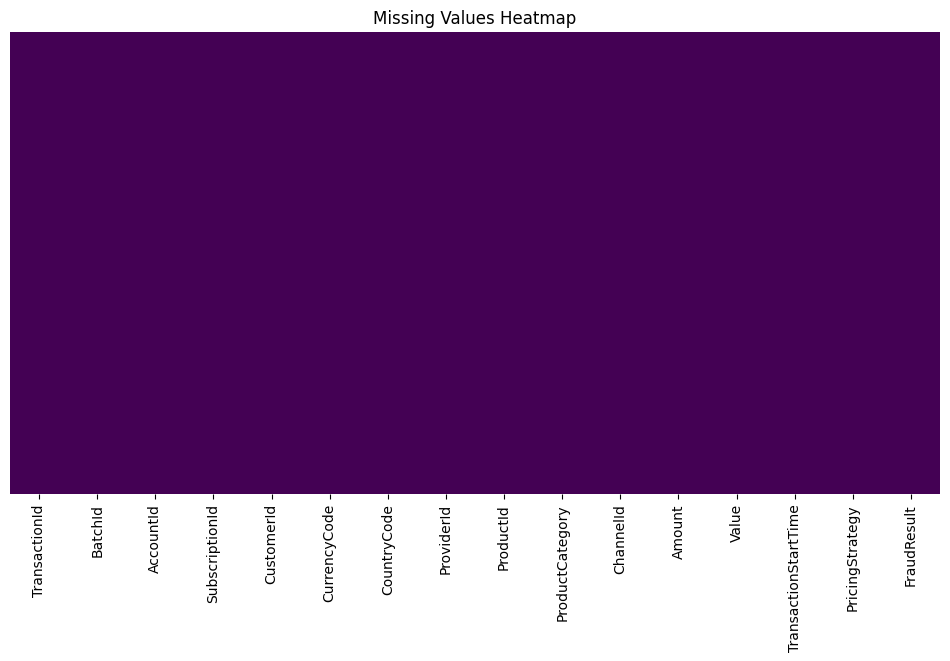

In [6]:
#  Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

###outlier detection

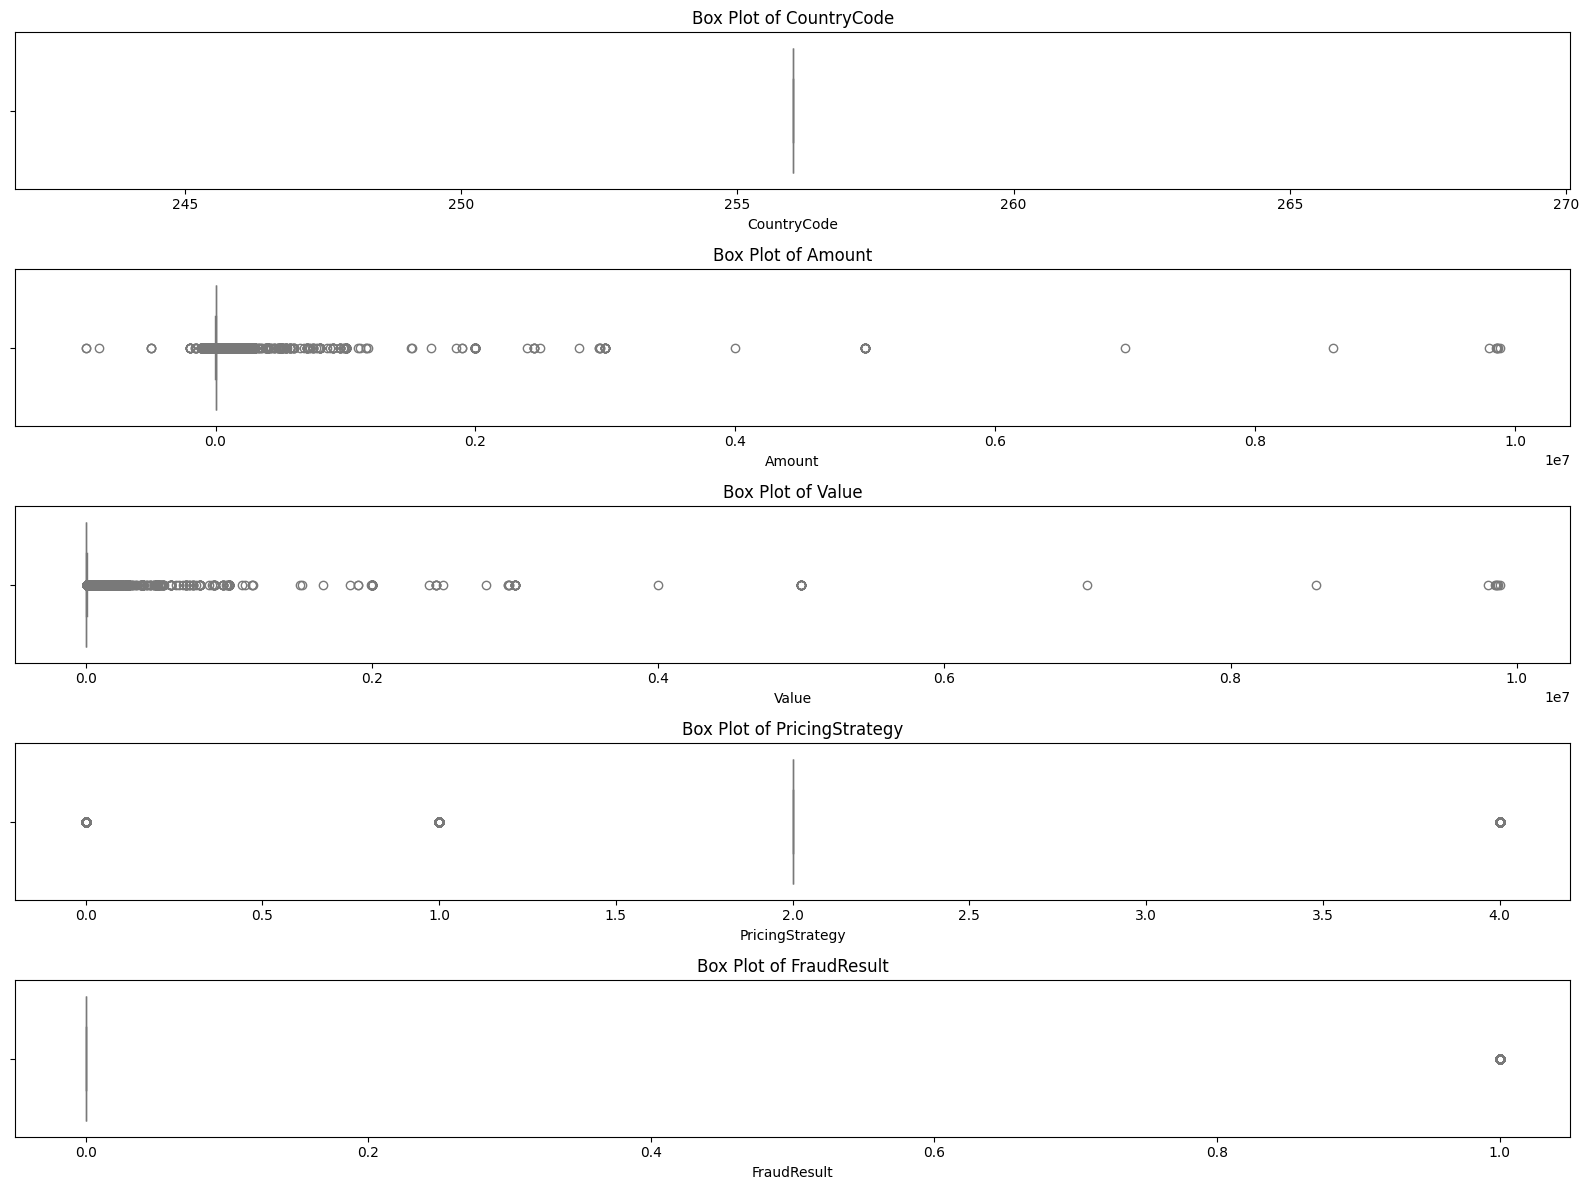

In [7]:

#  Select only numerical features
numeric_df = df.select_dtypes(include='number')

# Set up the visualizations
plt.figure(figsize=(16, 12))

# Create box plots for each numerical feature
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns), 1, i + 1)
    sns.boxplot(data=numeric_df, x=column, color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

###Box Plot:
The box plot provides a visual summary of the distribution of the data.
The central box represents the interquartile range (IQR), which contains the middle 50% of the data.
The line inside the box represents the median.
Whiskers extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles.
Points outside this range are considered outliers and are typically marked individually.
Visualization Setup:
The plots are arranged vertically for better readability.
The sns.boxplot() function creates the box plots for each numerical feature.